The dataset used in this notebook is MNIST dataset. You can download it by using built in TF functions.

In [1]:
import tensorflow as tf
from autoencoders_helper_functions import *
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist_data = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


![](stacked_autoencoder.png)

The structure of the Stacked Autoencoder is a bit different from the Simple Autoencoder. The Stacked Autoencoder has 2 and more hidden layers in the Encoder part and only one (output) layer in the Decoder part.

### Step 1. Placeholders

In [3]:
inputs = tf.placeholder(tf.float32, [None, 784])
targets = tf.placeholder(tf.float32, [None, 784])

### Step 2. Define the architecture of the Autoencoder

In [12]:
encoder = dense_custom(inputs, 784, 100)
encoder = dense_custom(encoder, 100, 15)
decoder = dense_custom(encoder, 15, 784, activation=None)

decoded = tf.nn.sigmoid(decoder)

### Step 3. Cost and Opt

In [13]:
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=decoder, labels=targets))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training time

In [14]:
session = tf.Session()

In [15]:
session.run(tf.global_variables_initializer())

In [16]:
epochs = 200
batch_size = 400
for e in range(epochs):
    cost_epo = []
    for ii in range(mnist_data.train.num_examples//batch_size):
        batch = mnist_data.train.next_batch(batch_size)
        feed = {inputs: batch[0], targets:batch[0]}
        batch_cost, _ = session.run([cost, optimizer], feed_dict=feed)
        cost_epo.append(batch_cost)
    if e % 20 == 0:
        print("Epoch: {}/{}...".format(e, epochs), "Training loss: {:.4f}".format(np.mean(cost_epo)))

Epoch: 0/200... Training loss: 0.3501
Epoch: 20/200... Training loss: 0.1288
Epoch: 40/200... Training loss: 0.1247
Epoch: 60/200... Training loss: 0.1231
Epoch: 80/200... Training loss: 0.1222
Epoch: 100/200... Training loss: 0.1217
Epoch: 120/200... Training loss: 0.1216
Epoch: 140/200... Training loss: 0.1212
Epoch: 160/200... Training loss: 0.1207
Epoch: 180/200... Training loss: 0.1208


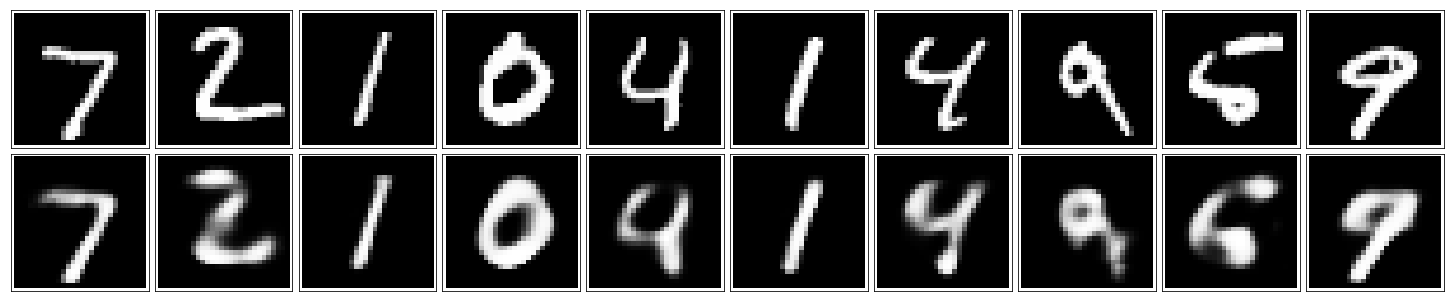

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist_data.test.images[:10]
reconstructed, compressed = session.run([decoded, encoder], feed_dict={inputs: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)
plt.show()

In [18]:
session.close()